### Jakub Ochman    grupa 3.   AiR
#### Zadanie 1
Implementacja algorytmu PERT:

In [ ]:
class Task: # Klasa reprezentująca czynność
    def __init__(self, id, start, end, t_c, t_m, t_p):  # id, zdarzenie początkowe, zdarzenie końcowe
        # czas optymistyczny, prawdopodobny, pesymistyczny
        self.id = id # identyfikator zadania
        self.start = start # zdarzenie początkowe
        self.end = end # zdarzenie końcowe
        self.t_c = t_c # czas optymistyczny
        self.t_m = t_m # czas prawdopodobny
        self.t_p = t_p # czas pesymistyczny
        self.t_0 = (t_c + 4*t_m + t_p) / 6 # czas oczekiwany
        self.L = 0 # rezerwa czasowa
        self.sigma_2 = 0 # wariancja


class Event: # Klasa reprezentująca zdarzenie
    def __init__(self, id): # id zdarzenia
        self.id = id # identyfikator zdarzenia
        self.early_time = 0 # czas najwcześniejszy
        self.late_time = float('inf') # czas najpóźniejszy
        self.incoming = [] # lista zadań przychodzących
        self.outgoing = [] # lista zadań wychodzących


def PERT(events, tasks): # Funkcja PERT
    # przypisanie zadań do zdarzeń
    for task in tasks: # Iteracja po zadaniach
        events[task.start].outgoing.append(task) # dodanie zadania do zdarzenia początkowego
        events[task.end].incoming.append(task) # dodanie zadania do zdarzenia końcowego

    # wyznaczenie porządku topologicznego zdarzeń
    sorted_events = [] # lista posortowanych zdarzeń
    visited = set() # zbiór odwiedzonych zdarzeń

    def visit(event): # Funkcja rekurencyjna do odwiedzania zdarzeń
        if event.id in visited: # jeśli zdarzenie zostało odwiedzone, to zwróć
            return 
        visited.add(event.id) # dodaj zdarzenie do zbioru odwiedzonych
        for task in event.incoming: # iteracja po zadaniach przychodzących
            visit(events[task.start]) # odwiedź zdarzenie początkowe
        sorted_events.append(event) # dodaj zdarzenie do listy posortowanych zdarzeń

    for event in events.values(): # iteracja po zdarzeniach
        visit(event) # odwiedź zdarzenie

    # wyznaczenie czasu najwcześniejszego dla zdarzeń
    for event in sorted_events: # iteracja po posortowanych zdarzeniach
        for task in event.incoming: # iteracja po zadaniach przychodzących
            task_end_time = events[task.start].early_time + task.t_0 # czas zakończenia zadania
            event.early_time = max(event.early_time, task_end_time)  # aktualizacja czasu najwcześniejszego

    # wyznaczenie czasu najpóźniejszego dla zdarzeń
    project_duration = max(e.early_time for e in events.values()) # czas trwania projektu
    for event in events.values(): # iteracja po zdarzeniach
        if not event.outgoing: # jeśli zdarzenie nie ma zadań wychodzących
            event.late_time = project_duration # ustawienie czasu najpóźniejszego na czas trwania projektu
 
    for event in reversed(sorted_events): # iteracja po posortowanych zdarzeniach w odwrotnej kolejności
        for task in event.outgoing: # iteracja po zadaniach wychodzących
            start_event = events[task.end] # zdarzenie początkowe
            task_start_latest = start_event.late_time - task.t_0 # czas najpóźniejszy rozpoczęcia zadania
            event.late_time = min(event.late_time, task_start_latest) # aktualizacja czasu najpóźniejszego

    # wyznaczenie ścieżki krytycznej i wariancji
    critical_path = [] # lista krytycznych czynności
    critical_nodes = [] # lista krytycznych zdarzeń
    total_variance = 0
    for task in tasks: # iteracja po zadaniach
        early_start = events[task.start].early_time # czas najwcześniejszy rozpoczęcia zadania
        late_start = events[task.end].late_time - task.t_0 # czas najpóźniejszy rozpoczęcia zadania
        task.L = late_start - early_start # rezerwa czasowa zadania
        task.sigma_2 = ((task.t_p - task.t_c) / 6) ** 2 # wyznaczenie wariancji zadania
        if task.L == 0: # jeśli rezerwa czasowa jest równa 0
            critical_path.append(task.id) # dodaj zadanie do ścieżki krytycznej
            total_variance += task.sigma_2
            if task.start not in critical_nodes:
                critical_nodes.append(task.start)
            if task.end not in critical_nodes:
                critical_nodes.append(task.end)

    return critical_path, critical_nodes, project_duration, total_variance 
# zwrócenie ścieżki krytycznej, czasu trwania projektu i wariancji całkowitej


Poniżej funkcja wyznaczająca prawdopodobieństwo realizacji przedsięwzięcia w czasie t_d. Funkcja przyjmuje parametry: t_d - czas dyrektywny, t_r - czas modelowy, sigma_2 - wariancja. Zwraca prawdopodobieńśtwo wyznaczone z wykorzystaniem biblioteki scipy 

In [135]:
from scipy.stats import norm # importowanie funkcji norm z biblioteki scipy

def probability(t_d, t_r, sigma_2): # Funkcja do obliczania prawdopodobieństwa
    # t_d - czas dyrektywny, t_r - czas modelowy, sigma_2 - wariancja
    x = (t_d - t_r) / (sigma_2 ** 0.5) # obliczenie wartości x
    return norm.cdf(x) # zwrócenie prawdopodobieństwa

Przykładowe użycie algorytmu. Wykorzystując słownik zdefiniowano przedsięwzięcie o 15 czynnościach i 14 zdarzeniach. W programie wypisano wyniki działania algorytmu: ścieżkę krytyczną, szacowany czas trwania przedsięwzięcia oraz wariancję. Dodatkowo wyznaczono prawdopodobieństwo realizacji przedsięwzięcia w trzech różnych terminach. Zgodnie z oczekiwaniami, czas dyrektywny równy szacowanemu daje właściwy rezultat - 50%

In [174]:
tasks = [
    Task('A', 1, 2, 4, 6, 9),
    Task('B', 1, 3, 3, 5, 7),
    Task('C', 2, 4, 5, 7, 10),
    Task('D', 2, 5, 2, 4, 6),
    Task('E', 3, 6, 6, 8, 11),
    Task('F', 4, 7, 7, 9, 13),
    Task('G', 5, 8, 3, 5, 7),
    Task('H', 6, 9, 4, 6, 9),
    Task('I', 7, 10, 5, 7, 10),
    Task('J', 8, 11, 8, 10, 12),
    Task('K', 9, 12, 6, 8, 11),
    Task('L', 10, 13, 7, 9, 12),
    Task('M', 11, 14, 9, 11, 14),
    Task('N', 12, 15, 4, 6, 8),
    Task('O', 13, 15, 7, 9, 12),
    Task('P', 14, 15, 3, 5, 7),
]

events = {i: Event(i) for i in range(1, len(tasks) + 1)}

critical_path, critical_nodes, duration, variance = PERT(events, tasks)
print("Czynności krytyczne:", critical_path)
print("Zdarzenia krytyczne:", critical_nodes)

print("Szacowany czas trwania projektu:", f"{duration:.2f}")
print("Wariancja:", f"{variance:.2f}")
print(f"Prawdopodobieństwo ukończenia projektu w czasie {duration:.2f}:", f"{probability(duration, duration, variance)*100:.2f}%")
print("Prawdopodobieństwo ukończenia projektu w czasie 52:", f"{probability(52, duration, variance)*100:.2f}%")
print("Prawdopodobieństwo ukończenia projektu w czasie 70:", f"{probability(70, duration, variance)*100:.2f}%")

Czynności krytyczne: ['A', 'C', 'F', 'I', 'L', 'O']
Zdarzenia krytyczne: [1, 2, 4, 7, 10, 13, 15]
Szacowany czas trwania projektu: 48.17
Wariancja: 4.47
Prawdopodobieństwo ukończenia projektu w czasie 48.17: 50.00%
Prawdopodobieństwo ukończenia projektu w czasie 52: 96.51%
Prawdopodobieństwo ukończenia projektu w czasie 70: 100.00%


Poniżej przedstawiono graficzną reprezentację sieci czynności. Kolorem czerwonym zaznaczono ścieżkę krytyczną, zarówno wierzchołki jak i czynności. Wewnątrz każdego wierzchołka reprezentującego zdarzenie znajduje się jego numer (lewa strona), najwczesniejszy możliwy termin rozpoczpoczęcia czynności (prawa strona, w górze), najpoźniejszy możliwy termin rozpoczpoczęcia czynności (prawa strona, w dole). Czynności podpisane są numerem oraz czasem realizacji w nawiasie. Do narysowania krawędzi i wyznaczenia współrzędnych wierzchołków wykorzystano bibliotekę NetworkX. Same wierzchołki zostały narysowane wykorzystując bibliotekę matplotlib.

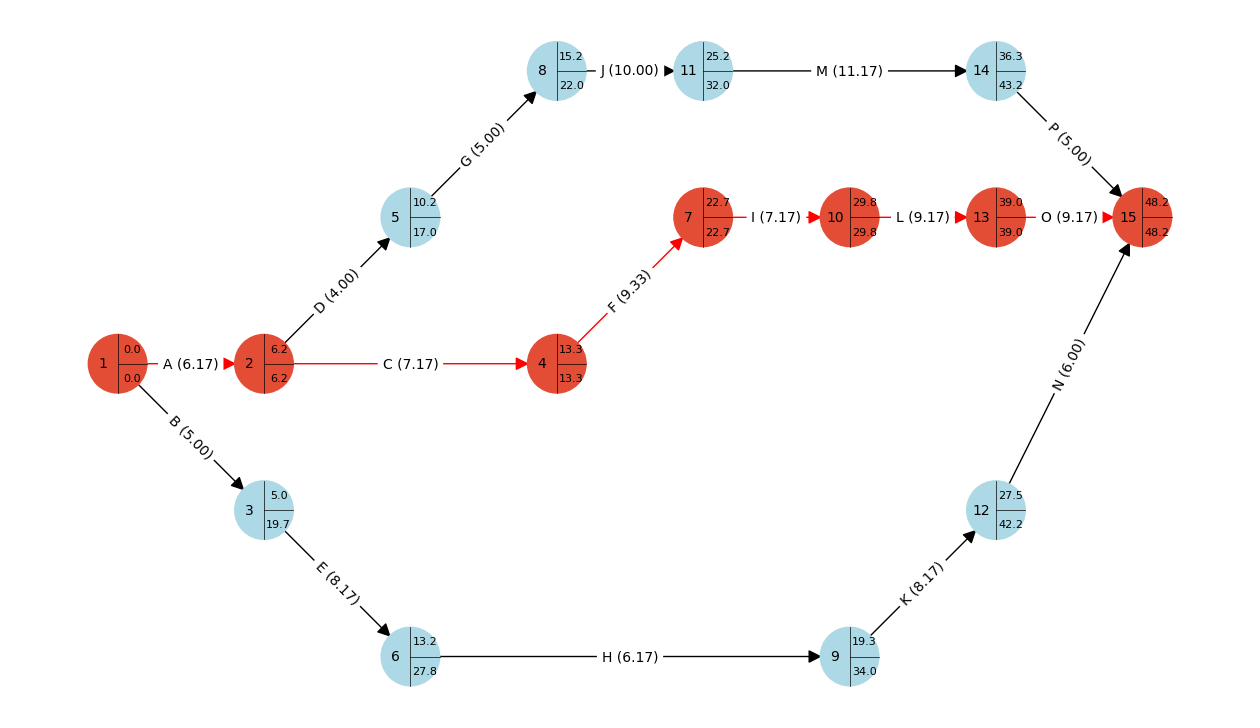

In [237]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

coordinates = { # definicja współrzędnych, żeby to wyglądało sensownie
    1: (0, 2),  
    2: (1, 2),
    3: (1, 1),
    4: (3, 2),
    5: (2, 3),
    6: (2, 0),
    7: (4, 3),
    8: (3, 4),
    9: (5, 0),
    10: (5, 3),
    11: (4, 4),
    12: (6, 1),
    13: (6, 3),
    14: (6, 4),
    15: (7, 3),
}

critical_edges = []
earliest_time = dict()
latest_time = dict()

for task in tasks: # dodawanie krawędzi
    G.add_edge(task.start, task.end, label=f"{task.id} ({task.t_0:.2f})") # dodanie krawędzi z odpowiednim opisem
    if task.id in critical_path: 
        critical_edges.append((task.start, task.end)) # dodanie krytycznej krawędzi do listy

for event in events:
    earliest_time[event] = events[event].early_time # przypisanie najwczesniejszego czasu
    latest_time[event] = events[event].late_time # przypisanie najpóźniejszego czasu

fig, ax = plt.subplots(figsize=(16, 10))
node_radius = 0.2

edge_colors = ['red' if edge in critical_edges else 'black' for edge in G.edges()] # oznaczenie na czrewono ścieżki krytycznej

nx.draw_networkx_edges(G, pos=coordinates, edge_color=edge_colors, min_target_margin=20, arrows=True, arrowsize=20, ax=ax)
# wyświetlenie krawędzi bez wierzchołków
edge_labels = nx.get_edge_attributes(G, 'label') # pobranie etykiet krawędzi

nx.draw_networkx_edge_labels(G, pos=coordinates, edge_labels=edge_labels, ax=ax) # wypisanie etykiet krawędzi

for node, (x, y) in coordinates.items(): # rysowanie wierzchołków
    if node in critical_nodes: 
        color_ = '#e34d36' # na czerwono zdarzenia krytyczne
    else:
        color_ = 'lightblue'# reszta na niebiesko
    circle = plt.Circle((x, y), node_radius, color=color_, zorder=2) # koło wyznaczajace wierzchołek
    ax.add_patch(circle)
    ax.plot([x, x], [y - node_radius, y + node_radius], color='black', linewidth=0.5, zorder=3) # linia pionowa
    ax.plot([x, x + node_radius], [y, y], color='black', linewidth=0.5, zorder=3) # linia pozioma
    ax.text(x-(node_radius/2), y, str(node), fontsize=10, ha='center', va='center', zorder=4) # id wierzchołka
    ax.text(x+(node_radius/2), y+(node_radius/2), f"{earliest_time[node]:.1f}", fontsize=8, ha='center', va='center', zorder=4)
    # najwcześniejszy czas rozpoczęcia
    ax.text(x+(node_radius/2), y-(node_radius/2), f"{latest_time[node]:.1f}", fontsize=8, ha='center', va='center', zorder=4)
    # najpóźniejszy czas rozpoczęcia
ax.set_aspect('equal')
ax.axis('off')
plt.show()








#### Zadanie 2
Implementacja wykresu Gantta

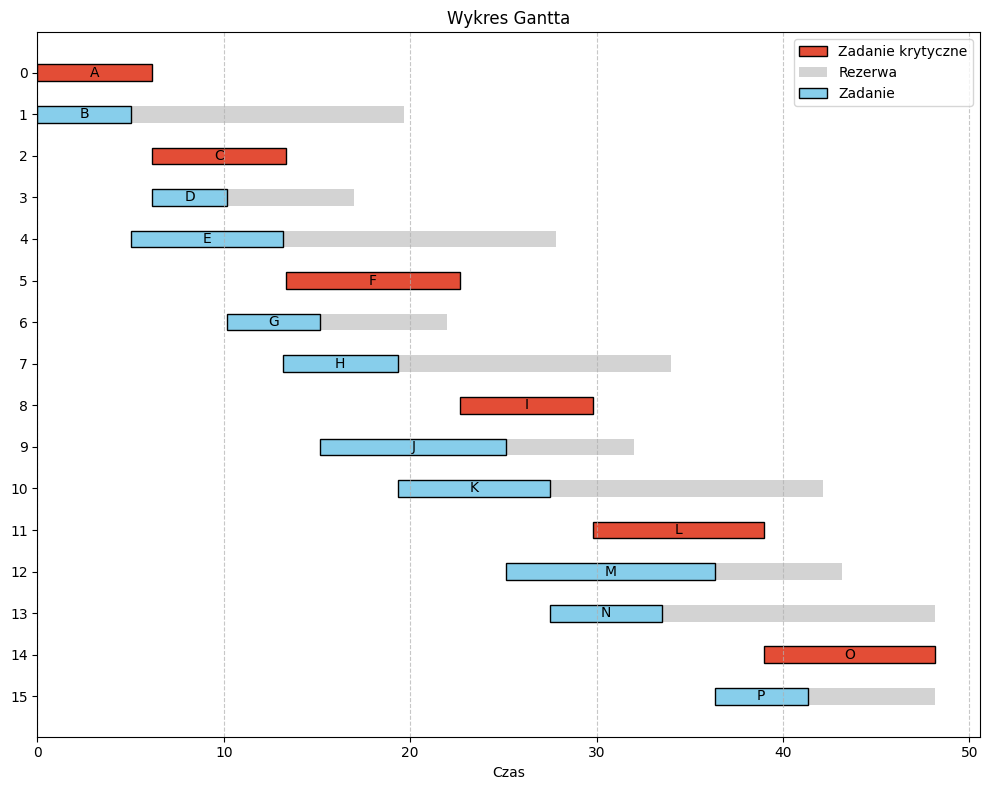

In [ ]:
import matplotlib.pyplot as plt

def draw_gantt_chart(tasks, events): # Funkcja do rysowania wykresu Gantta
    # tasks - lista zadań, events - lista zdarzeń
    fig, ax = plt.subplots(figsize=(10, len(tasks) * 0.5)) # tworzenie wykresu

    yticks = [] # lista do przechowywania wartości y
    yticklabels = [] # lista do przechowywania etykiet y

    shown_labels = set() # zbiór do przechowywania etykiet

    for i, task in enumerate(tasks): # iteracja po zadaniach
        start_time = events[task.start].early_time  # czas rozpoczęcia zadania
        duration = task.t_0 # oczekiwany czas trwania zadania
        reserve = task.L # rezerwa czasowa

        if reserve > 0: # jeśli rezerwa czasowa jest większa od 0
            label = 'Rezerwa' if 'Rezerwa' not in shown_labels else '_nolegend_' # etykieta rezerwy
            ax.barh(i, duration + reserve, left=start_time, height=0.4,  # rysowanie rezerwy
                    color='lightgray', edgecolor='none', label=label) # dodanie rezerwy do wykresu
            shown_labels.add('Rezerwa') # dodanie etykiety rezerwy do zbioru
 
        if task.L == 0: # jeśli rezerwa czasowa jest równa 0
            color = '#e34d36' # kolor czerwony
            label = 'Zadanie krytyczne' # etykieta zadania krytycznego
        else:
            color = 'skyblue' # kolor niebieski
            label = 'Zadanie' # etykieta zadania

        if label in shown_labels: # jeśli etykieta została już pokazana
            label = '_nolegend_' ## nie pokazuj etykiety ponownie
        else: # jeśli etykieta nie została pokazana
            shown_labels.add(label)  # dodaj etykietę do zbioru

        ax.barh(i, duration, left=start_time, height=0.4, # rysowanie zadania
                color=color, edgecolor='black', label=label) #  dodanie zadania do wykresu

        ax.text(start_time + duration / 2, i, f"{task.id}", va='center', ha='center', color='black') 
        # dodanie etykiety zadania do wykresu

        yticks.append(i) # dodanie wartości y do listy
        yticklabels.append(i) # dodanie etykiety y do listy

    ax.set_yticks(yticks) # ustawienie wartości y na wykresie
    ax.set_yticklabels(yticklabels) # ustawienie etykiet y na wykresie
    ax.set_xlabel('Czas') # dodanie etykiety osi x
    ax.set_title('Wykres Gantta') # dodanie tytułu wykresu
    ax.invert_yaxis()  # odwrócenie osi y
    ax.legend(loc='upper right') # dodanie legendy do wykresu
    plt.grid(axis='x', linestyle='--', alpha=0.7) # dodanie siatki do wykresu
    plt.tight_layout() # dostosowanie wykresu do rozmiaru okna
    plt.show() # wyświetlenie wykresu

draw_gantt_chart(tasks, events) # rysowanie wykresu Gantta


#### Zadanie 3
Na wykresie Gantta rezerwa czasu dla czynności przedstawiany jest zwykle jako dodatkowy, jaśniejszy odcinek lub przerwa po głównym pasku danej czynności. Pokazuje on, ile maksymalnie może się opóźnić dana czynność, nie wpływając na opóźnienie całego projektu. Rezerwa czasu pozwala na elastyczniejsze zarządzanie zadaniami oraz identyfikację czynności krytycznych, które nie mają zapasu i muszą być wykonane dokładnie według planu. W tym przypadku został zaznaczony szarym kolorem, bez czarnej ramki

#### Źródła:
- Na podstawie materiałów z zajęć oraz wykładu
- Na podstawie opisu algorytmu https://staff.uz.zgora.pl/mpatan/materialy/badoper/wyklady/druk_6z.pdf
- Na podstawie dokumentacji https://networkx.org/documentation/latest/
- Na podstawie dokumentacji https://matplotlib.org/stable/users/index.html
#### Środowisko:
Jupiter Notebook w Visual Studio Code z rozszerzeniem Jupiter, Python
